# Financial Insights Dashboard and Scoring Model

## Data loading

In [147]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [148]:
data = pd.read_excel("family_financial_and_transactions_data.xlsx")

In [149]:
data.head()

,Family ID,Member ID,Transaction Date,Category,Amount,Income,Savings,Monthly Expenses,Loan Payments,Credit Card Spending,Dependents,Financial Goals Met (%)
0,FAM001,FAM001_Member1,2024-10-07,Travel,409.12,113810,20234,5781,2422,2959,2,68
1,FAM001,FAM001_Member1,2024-10-16,Travel,270.91,113810,20234,5781,2422,2959,2,68
2,FAM001,FAM001_Member1,2024-10-17,Groceries,91.10,113810,20234,5781,2422,2959,2,68
3,FAM001,FAM001_Member1,2024-10-25,Healthcare,198.23,113810,20234,5781,2422,2959,2,68
4,FAM001,FAM001_Member1,2024-10-25,Education,206.42,113810,20234,5781,2422,2959,2,68


## Data Analysis

### Basic Info of Dataset

In [15]:
for col in data.columns:
    print(data[col].value_counts().head(10))
    print('------------------------------------------------------------------------')

Family ID
FAM194    167
FAM005    165
FAM187    156
FAM050    155
FAM071    144
FAM081    139
FAM128    139
FAM138    136
FAM058    136
FAM025    136
Name: count, dtype: int64
------------------------------------------------------------------------
Member ID
FAM006_Member3    30
FAM194_Member1    30
FAM123_Member2    30
FAM084_Member2    30
FAM194_Member7    30
FAM194_Member6    30
FAM186_Member5    30
FAM152_Member2    30
FAM060_Member5    30
FAM133_Member4    30
Name: count, dtype: int64
------------------------------------------------------------------------
Transaction Date
2024-10-26    565
2024-10-24    564
2024-10-01    562
2024-10-16    560
2024-10-25    560
2024-10-07    556
2024-10-13    543
2024-10-12    543
2024-10-30    538
2024-10-31    534
Name: count, dtype: int64
------------------------------------------------------------------------
Category
Groceries        2390
Entertainment    2383
Utilities        2359
Food             2355
Education        2338
Travel           

In [19]:
for col in data.columns:
    print(f"unique values in {col} column is:{data[col].nunique()}")
    print('----------------------------------------------')

unique values in Family ID column is:200
----------------------------------------------
unique values in Member ID column is:926
----------------------------------------------
unique values in Transaction Date column is:31
----------------------------------------------
unique values in Category column is:7
----------------------------------------------
unique values in Amount column is:13907
----------------------------------------------
unique values in Income column is:200
----------------------------------------------
unique values in Savings column is:200
----------------------------------------------
unique values in Monthly Expenses column is:198
----------------------------------------------
unique values in Loan Payments column is:193
----------------------------------------------
unique values in Credit Card Spending column is:196
----------------------------------------------
unique values in Dependents column is:6
----------------------------------------------
unique values 

In [20]:
data.isnull().sum()

Family ID                  0
Member ID                  0
Transaction Date           0
Category                   0
Amount                     0
Income                     0
Savings                    0
Monthly Expenses           0
Loan Payments              0
Credit Card Spending       0
Dependents                 0
Financial Goals Met (%)    0
dtype: int64

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16306 entries, 0 to 16305
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Family ID                16306 non-null  object        
 1   Member ID                16306 non-null  object        
 2   Transaction Date         16306 non-null  datetime64[ns]
 3   Category                 16306 non-null  object        
 4   Amount                   16306 non-null  float64       
 5   Income                   16306 non-null  int64         
 6   Savings                  16306 non-null  int64         
 7   Monthly Expenses         16306 non-null  int64         
 8   Loan Payments            16306 non-null  int64         
 9   Credit Card Spending     16306 non-null  int64         
 10  Dependents               16306 non-null  int64         
 11  Financial Goals Met (%)  16306 non-null  int64         
dtypes: datetime64[ns](1), float64(1)

In [26]:
data_categorical = data.select_dtypes(include = "object")
data_numerical = data.select_dtypes(exclude = "object")

In [27]:
data_categorical.head()

,Family ID,Member ID,Category
0,FAM001,FAM001_Member1,Travel
1,FAM001,FAM001_Member1,Travel
2,FAM001,FAM001_Member1,Groceries
3,FAM001,FAM001_Member1,Healthcare
4,FAM001,FAM001_Member1,Education


In [32]:
data_categorical.nunique()

Family ID    200
Member ID    926
Category       7
dtype: int64

In [28]:
data_numerical.head()

,Transaction Date,Amount,Income,Savings,Monthly Expenses,Loan Payments,Credit Card Spending,Dependents,Financial Goals Met (%)
0,2024-10-07,409.12,113810,20234,5781,2422,2959,2,68
1,2024-10-16,270.91,113810,20234,5781,2422,2959,2,68
2,2024-10-17,91.10,113810,20234,5781,2422,2959,2,68
3,2024-10-25,198.23,113810,20234,5781,2422,2959,2,68
4,2024-10-25,206.42,113810,20234,5781,2422,2959,2,68


In [199]:
data['unique_member_count'] = data.groupby('Family ID')['Member ID'].transform('nunique')
data.head()

,Family ID,Member ID,Transaction Date,Category,Amount,Income,Savings,Monthly Expenses,Loan Payments,Credit Card Spending,Dependents,Financial Goals Met (%),unique_member_count
0,FAM001,FAM001_Member1,2024-10-07,Travel,409.12,113810,20234,5781,2422,2959,2,68,4
1,FAM001,FAM001_Member1,2024-10-16,Travel,270.91,113810,20234,5781,2422,2959,2,68,4
2,FAM001,FAM001_Member1,2024-10-17,Groceries,91.10,113810,20234,5781,2422,2959,2,68,4
3,FAM001,FAM001_Member1,2024-10-25,Healthcare,198.23,113810,20234,5781,2422,2959,2,68,4
4,FAM001,FAM001_Member1,2024-10-25,Education,206.42,113810,20234,5781,2422,2959,2,68,4


### *Family-level and Member-level spending patterns*

In [118]:
# Total spending per family
family_spending = data.groupby('Family ID')['Amount'].sum().sort_values(ascending=False).head(10)

# Total spending per member
member_spending = data.groupby('Member ID')['Amount'].sum().sort_values(ascending=False).head(10)

In [118]:
# Total spending per family
family_spending = data.groupby('Family ID')['Amount'].sum().sort_values(ascending=False).head(10)

# Total spending per member
member_spending = data.groupby('Member ID')['Amount'].sum().sort_values(ascending=False).head(10)

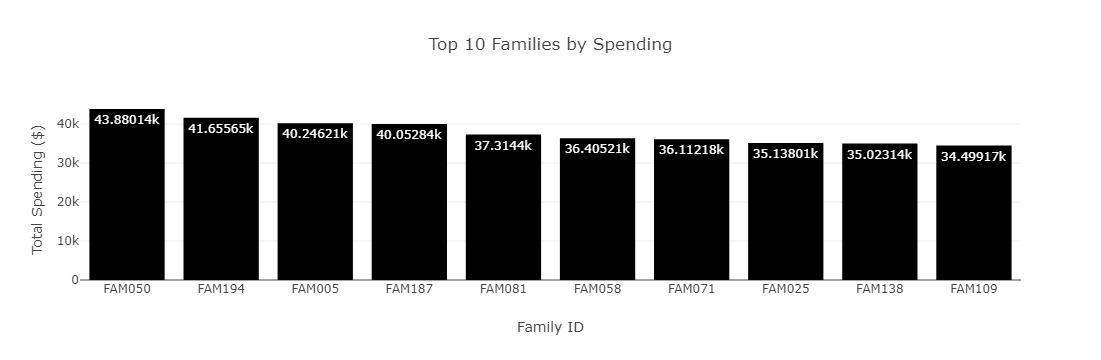

In [207]:
# Family-wise spending trends
fig2 = px.bar(
    family_spending.head(10).reset_index(),
    x='Family ID',
    y='Amount',
    title='Top 10 Families by Spending',
    labels={'Amount': 'Total Spending ($)', 'Family ID': 'Family ID'},
    text_auto=True)
fig2.show()

- ***The top spending family is FAM050, with total spending of $43.88014K.***
- ***Families vary significantly in total expenditures, reflecting diverse financial behaviors.***

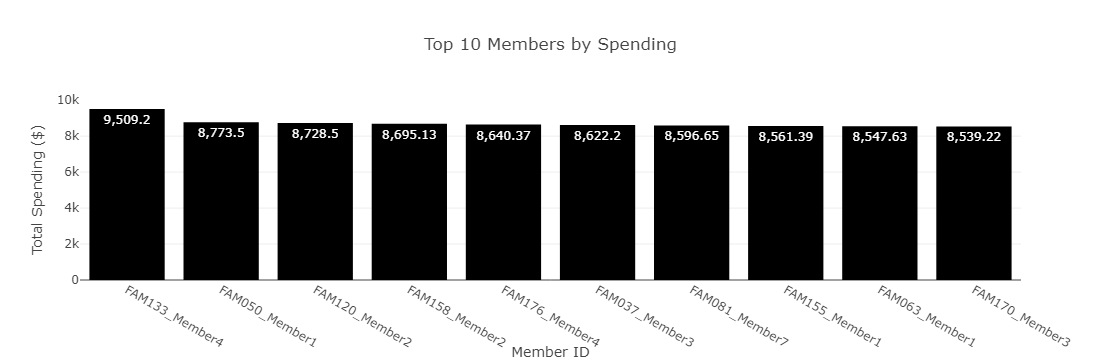

In [208]:
# Member-wise spending trends
fig3 = px.bar(
    member_spending.head(10).reset_index(),
    x='Member ID',
    y='Amount',
    title='Top 10 Members by Spending',
    labels={'Amount': 'Total Spending ($)', 'Member ID': 'Member ID'},
    text_auto=True)
fig3.show()

- ***The highest-spending individual is FAM133_Member4, spending $9.509.20k.***
- ***Spending varies among family members, suggesting different roles or responsibilities (e.g., primary earners or dependents).***

### *Correlation Analysis*

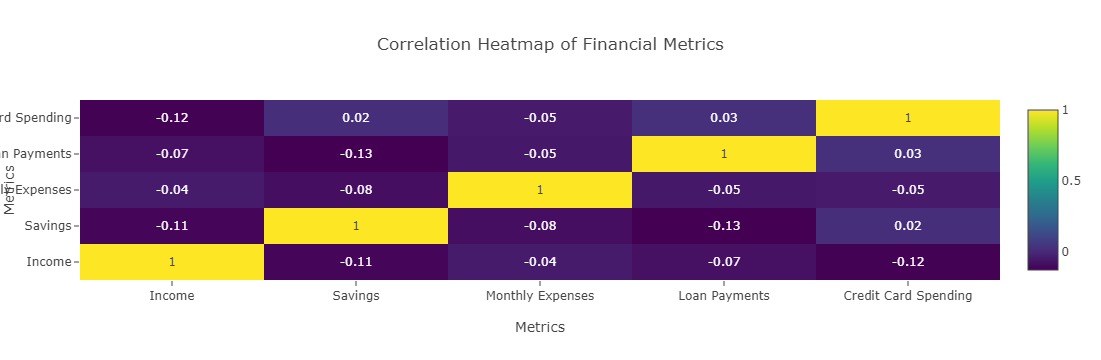

In [209]:
correlations = data[['Income', 'Savings', 'Monthly Expenses', 'Loan Payments', 'Credit Card Spending']].corr()

fig4 = go.Figure(data=go.Heatmap(
    z=correlations.values, 
    x=correlations.columns,  
    y=correlations.columns, 
    colorscale='Viridis',
    text=np.round(correlations.values, 2),
    texttemplate="%{text}"
))

fig4.update_layout(
    title="Correlation Heatmap of Financial Metrics",
    xaxis_title="Metrics",
    yaxis_title="Metrics"
)

# Show the heatmap
fig4.show()


#### ***Obsevation***
1. Savings vs. Income: Slight negative correlation (-0.11), implying higher income does not always lead to higher savings.
2. Loan Payments vs. Savings: Weak negative correlation (-0.13), indicating debt obligations may hinder savings accumulation.
3. Income vs. Credit Card Spending: Slight negative correlation (-0.12), suggesting higher income families rely less on credit cards.

## Financial Scoring Model

#### logic for assigning weights 

- Savings-to-Income Ratio-30%: A strong savings buffer is critical for long-term stability and emergency preparedness.
- Expenses-to-Income Ratio-25%: High monthly expenses relative to income indicate poor budgeting, which directly impacts health.
- Loan Payments-to-Income-20%: High loan payments can strain finances, but they are typically more structured and manageable.
- Credit Card Spending Trends-15%: Overreliance on credit cards can indicate risky financial behavior or insufficient cash flow.
- Spending Category Balance-10%: Excessive discretionary spending (e.g., on travel/entertainment) reduces savings potential.
- Financial Goals Met-15%: More the goals met means more stability in family financial condions.

In [210]:
weights = {
    'Savings_to_Income': 0.25,
    'Expenses_to_Income': 0.20,
    'Loan_to_Income': 0.15,
    'Credit_Card_Spending': 0.15,
    'Spending_Category_Balance': 0.10,
    'Financial_Goals_Met_weight': 0.15
}

def calculate_savings_to_income(savings, income):
    return min(savings / income, 1) * 100

def calculate_expenses_to_income(expenses, income):
    return min(expenses / income, 1) * 100

def calculate_loan_to_income(loans, income):
    return min(loans / income, 1) * 100

def spending_category_penalty(category_spending):
    discretionary_categories = ['Entertainment', 'Travel', 'Food']
    discretionary_spending = category_spending.loc[category_spending.index.isin(discretionary_categories)].sum()
    total_spending = category_spending.sum()
    penalty_ratio = discretionary_spending / total_spending if total_spending > 0 else 0
    return max(0, (1 - penalty_ratio) * 100)


In [211]:
family_scores = []

for family_id, group in data.groupby('Family ID'):
    income = group['Income'].iloc[0]  # Assume constant income for a family
    savings = group['Savings'].iloc[0]
    expenses = group['Monthly Expenses'].iloc[0]
    loans = group['Loan Payments'].iloc[0]
    credit_card = group['Credit Card Spending'].iloc[0]
    
    # Spending by category for penalty
    category_spending = group.groupby('Category')['Amount'].sum()
    category_penalty = spending_category_penalty(category_spending)
    
    # Calculate individual sub-scores
    savings_to_income_score = calculate_savings_to_income(savings, income)
    expenses_to_income_score = 100 - calculate_expenses_to_income(expenses, income)
    loan_to_income_score = 100 - calculate_loan_to_income(loans, income)
    credit_card_score = max(0, (1 - (credit_card / income)) * 100)

    financial_goals_met_score = group['Financial Goals Met (%)'].iloc[0]
    
    # Weighted score
    final_score = (
        savings_to_income_score * weights['Savings_to_Income'] +
        expenses_to_income_score * weights['Expenses_to_Income'] +
        loan_to_income_score * weights['Loan_to_Income'] +
        credit_card_score * weights['Credit_Card_Spending'] +
        category_penalty * weights['Spending_Category_Balance'] +
        financial_goals_met_score * weights['Financial_Goals_Met_weight']
    )
    
    family_scores.append({'Family ID': family_id, 'Score': round(final_score, 2)})

In [212]:

family_Financial_Score = pd.DataFrame(family_scores)
family_Financial_Score
family_Financial_Score_df_highest = family_Financial_Score.sort_values(by='Score', ascending = False).head(10)
family_Financial_Score_df_lowest = family_Financial_Score.sort_values(by='Score', ascending = True).head(10)

### *Category-wise spending trends*

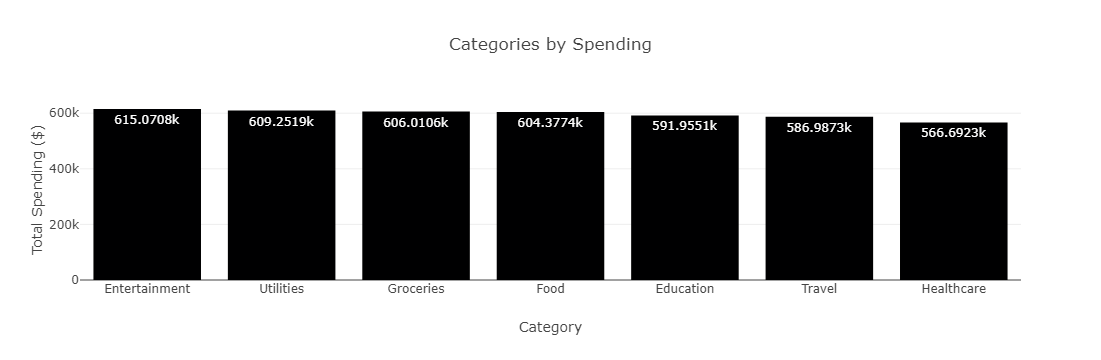

In [213]:
category_spending = data.groupby('Category')['Amount'].sum().sort_values(ascending=False)

fig1 = px.bar(
    category_spending.reset_index(),
    x='Category',
    y='Amount',
    title='Categories by Spending',
    labels={'Amount': 'Total Spending ($)', 'Category': 'Category'},
    text_auto=True)
fig1.show()

***Top spending categories are:***
1. Entertainment: 615,070.77k
2. Utilities: 609,251.87k
3. Groceries: 606,010.58k
   
***Discretionary spending (e.g., Entertainment) appears to consume a significant portion, potentially affecting financial health.***

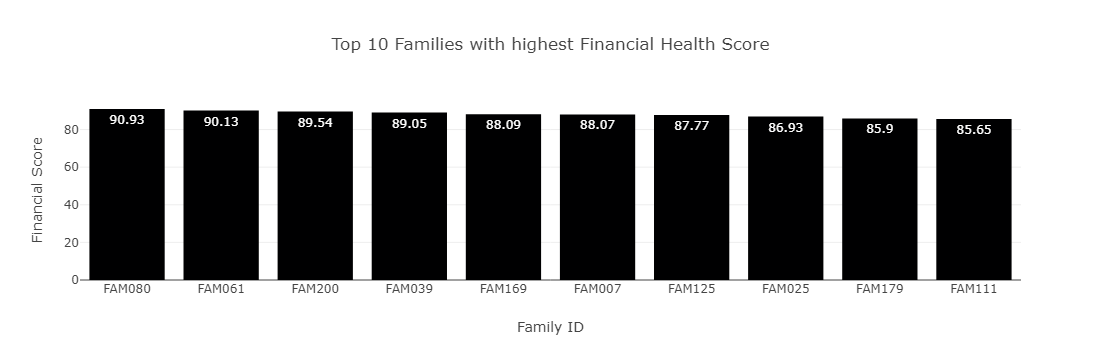

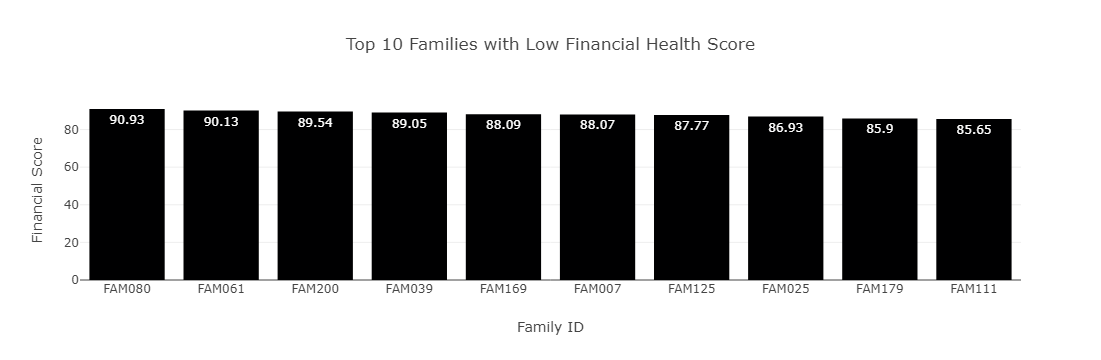

In [214]:
# Family-wise financial scores
fig5 = px.bar(
    family_Financial_Score_df_highest,
    x='Family ID',
    y='Score',
    title='Top 10 Families with highest Financial Health Score',
    labels={'Score': 'Financial Score', 'Family ID': 'Family ID'},
    text_auto=True
)
fig5.show()
# Family-wise financial scores
fig6 = px.bar(
    family_Financial_Score_df_highest,
    x='Family ID',
    y='Score',
    title='Top 10 Families with Low Financial Health Score',
    labels={'Score': 'Financial Score', 'Family ID': 'Family ID'},
    text_auto=True
)
fig6.show()

In [221]:
num_cols = data_numerical.columns.tolist()
cat_cols = data_categorical.columns.tolist()

In [222]:
from sklearn.pipeline import Pipeline

In [ ]:
cat_pipeline = Pipeline()